# 感知机改进算法

## 导包

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
# from sklearn import preprocessing

font = r'C:\Windows\Fonts\simfang.ttf'

## 导入数据集

In [2]:
data = pd.read_csv(r"./dataset/iris.csv")
data

,sepal length,sepal width,petal length,petal width,class
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,Iris-virginica
146,6.3,2.5,5.0,1.9,Iris-virginica
147,6.5,3.0,5.2,2.0,Iris-virginica
148,6.2,3.4,5.4,2.3,Iris-virginica


## 数据解释  
1.萼片长度（以厘米计）  
2.萼片宽度（以厘米计）  
3.花瓣长度（以厘米计）  
4.花瓣宽度（以厘米计）  
5.类别：  

## 数据预处理  

### 选择数据集中四列数据  
两列作为输入数据，一列作为输出数据

In [3]:
col = ['sepal length','petal width','class']
data = pd.DataFrame(data,columns = col)

### 取前100行作为本次实验数据

In [4]:
data = data[51:]
data

,sepal length,petal width,class
51,6.4,1.5,Iris-versicolor
52,6.9,1.5,Iris-versicolor
53,5.5,1.3,Iris-versicolor
54,6.5,1.5,Iris-versicolor
55,5.7,1.3,Iris-versicolor
...,...,...,...
145,6.7,2.3,Iris-virginica
146,6.3,1.9,Iris-virginica
147,6.5,2.0,Iris-virginica
148,6.2,2.3,Iris-virginica


### 重写class

In [5]:
data.loc[(data['class']=='Iris-virginica'),'class'] = 1
data.loc[(data['class']=='Iris-versicolor'),'class'] = -1

### 打乱数据

In [6]:
data = data.sample(frac=1)
data

,sepal length,petal width,class
127,6.1,1.8,1
134,6.1,1.4,1
130,7.4,1.9,1
137,6.4,1.8,1
148,6.2,2.3,1
...,...,...,...
128,6.4,2.1,1
143,6.8,2.3,1
53,5.5,1.3,-1
88,5.6,1.3,-1


### 取值

In [7]:
data = data.values

### 绘图

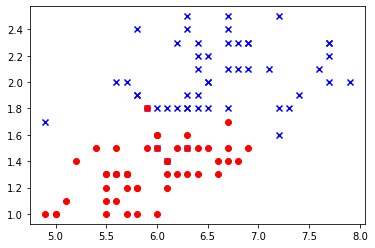

In [8]:
for i in range(len(data)):
    if data[i][-1] == -1:
        plt.scatter(data[i][0],data[i][1],c='r',marker='o')
    else:
        plt.scatter(data[i][0],data[i][1],c='b',marker='x')
plt.show()

### 划分训练集与测试集

In [9]:
training = data[:70]
test = data[70:]
len(test)

29

In [10]:
x = test[0][:-1]
x

array([6.4, 1.3], dtype=object)

In [11]:
y = test[0][-1:]
y

array([-1], dtype=object)

# 一些工具函数

In [12]:
def makeArray(I,J):
    m = []
    for i in range(I):
        fill = np.random.random()
        m.append([fill]*J)
    return m

In [13]:
def sign(a):
    if a>0:
        return 1
    else:
        return -1

# 一、感知机模型

In [14]:
def feeling():
    w = np.zeros(2)
    lr = 0.001
    c = 1
#     循环遍历计数
    cnt = 0
    while True:
        cnt += 1
#         遍历次数超过1000时跳出循环，学习结束
        if cnt > 1000:
            break
        for i in range(len(training)):
            x = np.array(training[i][:-1])
            y = np.array(training[i][-1])

            s = np.sum(w*x)-c
            z = sign(s)
            if y * z <= 0:
#                 e = y-z
#                 w = w+lr*e*x
#                 c = np.sum(lr*e)+c
                w = w+lr*y*x
                c = c+lr*y
    return cnt,w,c

迭代次数： 1001
超平面法向量： [0.06199999999999569 0.6899999999999585]
阈值： 1.472999999999948


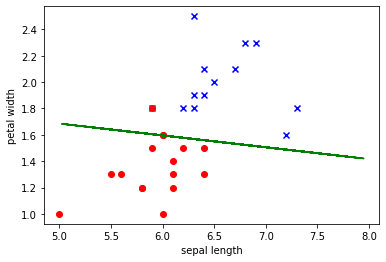

测试集准确率： 0.896551724137931


In [15]:
if __name__=='__main__':
    cnt,w,c=feeling()
    print("迭代次数：",cnt)
    print("超平面法向量：",w)
    print("阈值：",c)
    count = 0
    for i in range(len(test)):
        target = test[i][-1:]
        result = sign(np.sum(w*test[i][:-1])-c)
        if(target == result):
            count += 1
    accuracy = float(count/len(test))
    for i in range(len(test)):
        if test[i][-1] == -1:
            plt.scatter(test[i][0],test[i][1],c='r',marker='o')
        else:
            plt.scatter(test[i][0],test[i][1],c='b',marker='x')
#     for i in range(len(data)):
#         if training[i][-1] == -1:
#             plt.scatter(data[i][0],data[i][1],c='r')
#         else:
#             plt.scatter(data[i][0],data[i][1],c='b')
    X = np.random.uniform(5,8,50)
    Y = -(w[0]*X-c)/w[1]
    plt.xlabel('sepal length')
    plt.ylabel('petal width')
    plt.plot(X,Y,'g')
    plt.show()
    print("测试集准确率：",accuracy)

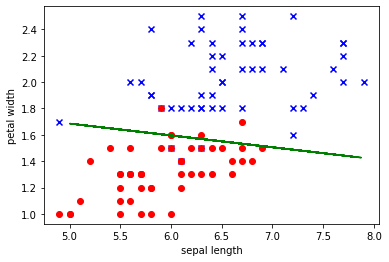

In [16]:
for i in range(len(data)):
    if data[i][-1] == -1:
        plt.scatter(data[i][0],data[i][1],c='r',marker='o')
    else:
        plt.scatter(data[i][0],data[i][1],c='b',marker='x')
X = np.random.uniform(5,8,50)
Y = -(w[0]*X-c)/w[1]
plt.xlabel('sepal length')
plt.ylabel('petal width')
plt.plot(X,Y,'g')
plt.show()

# 二、口袋算法

In [17]:
def checkErrorRate(training,w,c):
    count=0
    for i in range(len(training)):
        x=np.array(training[i][:-1])
        y=training[i][-1]
        if np.sign(np.sum(w*x)-c)!=np.sign(y):
            count+=1
    return count/len(training)

In [18]:
def Pocket():
    w = np.zeros(2)
    lr = 0.001
    c = 1
    best_w = w
    bestRate = 1
    best_c = c
#     循环遍历计数
    cnt = 0
    while True:
        cnt += 1
#         遍历次数超过1000时跳出循环，学习结束
        if cnt > 1000:
            break
        for i in range(len(training)):
            x = np.array(training[i][:-1])
            y = training[i][-1]
            
            s = np.sum(w*x)-c
            z = sign(s)
            if y*z <= 0:
#                 e = y-z
#                 w = w+lr*e*x
#                 c = np.sum(lr*e)+c
                w = w+lr*y*x
                c = c+lr*y
                rate = checkErrorRate(training,w,c)
                if rate<bestRate:
                    bestRate = rate
                    best_w = w
                    best_c = c
    return cnt,best_w,best_c

迭代次数： 1001
超平面法向量： [0.09489999999999844 0.2971000000000009]
阈值： 1.1039999999999885


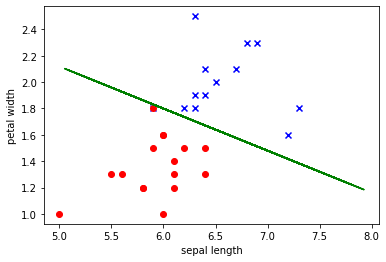

准确率： 0.9655172413793104


In [19]:
if __name__=='__main__':
    cnt,best_w,best_c=Pocket()
    print("迭代次数：",cnt)
    print("超平面法向量：",best_w)
    print("阈值：",best_c)
    count = 0
    for i in range(len(test)):
        target = test[i][-1:]
        result = sign(np.sum(best_w*test[i][:-1])-best_c)
        if(target == result):
            count += 1
    accuracy = float(count/len(test))
    for i in range(len(test)):
        if test[i][-1] == -1:
            plt.scatter(test[i][0],test[i][1],c='r',marker='o')
        else:
            plt.scatter(test[i][0],test[i][1],c='b',marker='x')
#     for i in range(len(data)):
#         if data[i][-1] == -1:
#             plt.scatter(data[i][0],data[i][1],c='r')
#         else:
#             plt.scatter(data[i][0],data[i][1],c='b')
    X = np.random.uniform(5,8,50)
    Y = -(best_w[0]*X-best_c)/best_w[1]
    plt.plot(X,Y,'g')
    plt.xlabel('sepal length')
    plt.ylabel('petal width')
    plt.show()
    print("准确率：",accuracy)

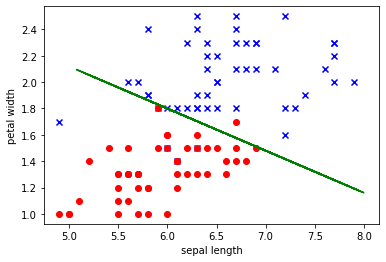

In [20]:
for i in range(len(data)):
    if data[i][-1] == -1:
        plt.scatter(data[i][0],data[i][1],c='r',marker='o')
    else:
        plt.scatter(data[i][0],data[i][1],c='b',marker='x')
X = np.random.uniform(5,8,50)
Y = -(best_w[0]*X-best_c)/best_w[1]
plt.xlabel('sepal length')
plt.ylabel('petal width')
plt.plot(X,Y,'g')
plt.show()